# For collab

In [1]:
# collab=1
# if collab:
#   from google.colab import drive
#   drive.mount('/content/drive')
# # #prashantpath
# #   %cd /content/drive/MyDrive/Projects/NepSense/Prashant/Profanity Detection
# # #samirpath
# %cd /content/drive/MyDrive/NepSense/Prashant/Profanity Detection
# # ReePath
#  #  %cd /content/drive/MyDrive/NepSense/Prashant/Profanity Detection
# import torch
# print(torch.__version__)


2.3.0+cpu


# Necessary library

In [2]:
# %pip install pandas --update
# %pip install matplotlib==3.9.0
# %pip install seaborn==0.13.2
# %pip install ai4bharat-transliteration==1.1.3
# %pip install gensim==4.3.2
# %pip install requests==2.22.0
# %pip install wget==3.2
# %pip install beautifulsoup4==4.12.3
# %pip install news-please==1.5.44
# %pip install pytesseract==0.3.10
# %pip install spello==1.2.0
# %pip install snowballstemmer==2.2.0
# %pip install tensorflow==2.16.1
# %pip install sentencepiece==0.2.0
# %pip install scikit-learn==1.4.2
# %pip install pydload==1.0.9
# %pip install tensorboardX==2.6.2.2
# # %pip install fairseq
# %pip install opencv-python==4.9.0.80
# %pip install transformers==4.41.0
# %pip install nepali-to-roman==1.1.1
# %pip install nepali-unicode-converter==1.0.3
# %pip install langdetect==1.0.9
# %pip install nltk==3.8.1
# %pip install tqdm



# Input and Output paths

In [3]:
# load the to-be-tested dataset C:\Users\samir\Desktop\NepSense-main\datas
filename="durgeshthapa.csv"
to_be_tested_dataset_input_path=f"..\datas\{filename}"
filtered_dataset_output_path=f"..\Profanity and Gender filtered Datas\{filename}"

# Keyword Gathering


### Manual Tagging Profanity Keywords

In [4]:
import pandas as pd
manual_tagging_df = pd.read_csv("./filterwordlist.csv")
manual_tagging_df

RawRom          RawNep         NormNep  \
0                                   adhinayak         अधिनायक         अधिनायक   
1                            adhinayak tantra  अधिनायक तन्त्र  अधिनायक तन्त्र   
2                               adhinayakatwa      अधिनायकत्व      अधिनायकत्व   
3                                adhinayakbad      अधिनायकवाद      अधिनायकवाद   
4                               adhinayakbadi     अधिनायकवादी     अधिनायकवादी   
...                                       ...             ...             ...   
1040                                      NaN             NaN             NaN   
1041                                      NaN             NaN             NaN   
1042                       point to be noted              NaN             NaN   
1043                   hijada only is nothing             NaN             NaN   
1044  ta ma or with noun aayo bhane profanity             NaN             NaN   

               NormRom  Offensiveness  IsTaboo     Class Class_Other  \
0            adhinayak            1.0      0.0  Politics         NaN   
1     adhinayak tantra            1.0      0.0  Politics         NaN   
2        adhinayakatwa            1.0      0.0  Politics         NaN   
3         adhinayakbad            1.0      0.0  Politics         NaN   
4        adhinayakbadi            1.0      0.0  Politics         NaN   
...                ...            ...      ...       ...         ...   
1040               NaN            NaN      NaN       NaN         NaN   
1041               NaN            NaN      NaN       NaN         NaN   
1042               NaN            NaN      NaN       NaN         NaN   
1043               NaN            NaN      NaN       NaN         NaN   
1044               NaN            NaN      NaN       NaN         NaN   

     Profanity Offensive  
0            0         1  
1            0         1  
2            0         1  
3            0         1  
4            0         1  
...        ...       ...  
1040       NaN       NaN  
1041       NaN       NaN  
1042       NaN       NaN  
1043       NaN       NaN  
1044       NaN       NaN  

[1045 rows x 10 columns]

In [5]:
# Checking the number of unique value in Profanity column
manual_tagging_df["Profanity"].value_counts()

Profanity
1            265
0            186
Profanity      1
Name: count, dtype: int64

In [6]:
# Checking the number of unique value in Offensive column
manual_tagging_df["Offensive"].value_counts()

Offensive
1            268
0             67
Offensive      1
Name: count, dtype: int64

In [7]:
# Ensure the 'Profanity' and 'Offensive' column is treated as strings
manual_tagging_df['Profanity'] = manual_tagging_df['Profanity'].astype(str)
manual_tagging_df['Offensive'] = manual_tagging_df['Offensive'].astype(str)

# Filter the manual_tagging_df DataFrame to get only the rows where the Profanity is '1'
manual_profanity_df = manual_tagging_df[manual_tagging_df["Profanity"] == '1']

# Filter the manual_tagging_df DataFrame to get only the rows where the Offensive is '1'
manual_offensive_df = manual_tagging_df[manual_tagging_df["Offensive"] == '1']

# Reset the index of the manual_profanity_df DataFrame and drop the old index (optional)
manual_profanity_df = manual_profanity_df.reset_index(drop=True)

# Reset the index of the manual_offensive_df DataFrame and drop the old index (optional)
manual_offensive_df = manual_offensive_df.reset_index(drop=True)

# The manual_profanity_df DataFrame now contains only the rows where the Profanity is '1', with a new index
manual_profanity_df

RawRom       RawNep      NormNep          NormRom  Offensiveness  \
0         alachhin      अलच्छिन      अलच्छिन       alachchhin            1.0   
1        alachhini       अलछिनि     अलच्छिनी        alachhini            4.0   
2            aimai        आइमाइ        आइमाई           aaimai            2.0   
3    ankho fodchhu  आँखो फोड्छु  आँखो फोड्नु  aankho phodchhu            3.0   
4     aukow fodxuh  आँखो फोड्छु  आँखो फोड्नु  aankho phodchhu            3.0   
..             ...          ...          ...              ...            ...   
260          hagnu        हग्नु        हग्नु            hagnu            5.0   
261         harami        हरामी        हरामी           harami            4.0   
262   hastamaithun    हस्तमैथुन    हस्तमैथुन     hastamaithun            5.0   
263       hutihara     हूतीहारा     हुतीहारा         hutihara            4.0   
264  what the fuck  ह्वाट दी फक  ह्वाट दि फक     what da phak            5.0   

     IsTaboo      Class   Class_Other Profanity Offensive  
0        0.0      Other           NaN         1         1  
1        0.0      Other           NaN         1         1  
2        0.0     Gender  Sex and Porn         1         1  
3        0.0     Action     Body Part         1         1  
4        0.0     Action     Body Part         1         1  
..       ...        ...           ...       ...       ...  
260      1.0  Excretion        Action         1         1  
261      0.0      Other           NaN         1         1  
262      1.0     Vulgar           NaN         1       nan  
263      0.0      Other           NaN         1       nan  
264      1.0     Vulgar      Imported         1       nan  

[265 rows x 10 columns]

In [8]:
manual_offensive_df

RawRom          RawNep         NormNep           NormRom  \
0           adhinayak         अधिनायक         अधिनायक         adhinayak   
1    adhinayak tantra  अधिनायक तन्त्र  अधिनायक तन्त्र  adhinayak tantra   
2       adhinayakatwa      अधिनायकत्व      अधिनायकत्व     adhinayakatwa   
3        adhinayakbad      अधिनायकवाद      अधिनायकवाद      adhinayakbad   
4       adhinayakbadi     अधिनायकवादी     अधिनायकवादी     adhinayakbadi   
..                ...             ...             ...               ...   
263          hawadari        हावादारी        हावादारी          hawadari   
264            hijada          हिँजडा           हिजडा          hinjhada   
265          hutihara        हुतीहारा        हुतीहारा          hutihara   
266             haija            हैजा            हैजा             haija   
267    hwau nabhayeko     ह्याउ नभएको     ह्याउ नभएको    hwau nabhayeko   

     Offensiveness  IsTaboo     Class Class_Other Profanity Offensive  
0              1.0      0.0  Politics         NaN         0         1  
1              1.0      0.0  Politics         NaN         0         1  
2              1.0      0.0  Politics         NaN         0         1  
3              1.0      0.0  Politics         NaN         0         1  
4              1.0      0.0  Politics         NaN         0         1  
..             ...      ...       ...         ...       ...       ...  
263            4.0      0.0     Other         NaN       nan         1  
264            5.0      1.0    Gender         NaN         0         1  
265            4.0      0.0     Other         NaN         0         1  
266            1.0      0.0   Disease         NaN         0         1  
267            4.0      0.0     Other         NaN         0         1  

[268 rows x 10 columns]

In [9]:
# Initialize an empty set for profanity words
profnaity_word_set = set()

# Update the profanity word set with the RawNep, RawRom, NormNep, and NormRom columns from the manual_profanity_df DataFrame
profnaity_word_set.update(
    set(manual_profanity_df["RawNep"]),
    set(manual_profanity_df["RawRom"]),
    set(manual_profanity_df["NormNep"]),
    set(manual_profanity_df["NormRom"])
)

# The profnaity_word_set set now contains unique profanity words from the RawNep, RawRom, NormNep, and NormRom columns of the manual_profanity_df DataFrame
profnaity_word_set

{'aachi',
 'aachi kha',
 'aachi khanu',
 'aaimai',
 'aankho phodchhu',
 'achi',
 'aimai',
 'alachchhin',
 'alachhin',
 'alachhini',
 'ankho fodchhu',
 'aukow fodxuh',
 'baiya',
 'bajiya',
 'balatkar',
 'balatkari',
 'banjhi',
 'banjho',
 'banji',
 'banjo',
 'beshya',
 'beshyalaya',
 'besia',
 'besya',
 'besyalaya',
 'bhak mujhi',
 'bhak muji',
 'bhalu',
 'bharjin',
 'bhayan chod',
 'bhiringi',
 'bhosada',
 'bhosadi',
 'bhutla',
 'bhutrako',
 'bhutro',
 'bhutroko',
 'bideshiko chhad',
 'bidhur',
 'birya',
 'boka',
 'boke',
 'boko',
 'bra',
 'bra ',
 'bra laal',
 'bujhi randi',
 'chak',
 'chandal',
 'chatnu',
 'chatnu, chhatnu',
 'cher',
 'chhakka',
 'chher',
 'chhttho',
 'chikam',
 'chikdai',
 'chikne',
 'chikum',
 'chod',
 'choda',
 'chusnu',
 'chut',
 'chutdaka',
 'chutdike',
 'chutini',
 'chutiya',
 'chutiyagiri',
 'daamnaa',
 'daka',
 'dakka',
 'dalal dhoti',
 'damini',
 'damna',
 'damni',
 'dhoti ko chhauro',
 'dhoti ko gu',
 'dhotiko chhauro',
 'dhotiko gu',
 'dhotini',
 'dudh',
 

In [10]:
# Initialize an empty set for offensive words
offensive_word_set = set()

# Update the offensive word set with the RawNep, RawRom, NormNep, and NormRom columns from the manual_offensive_df DataFrame
offensive_word_set.update(
    profnaity_word_set,
    set(manual_profanity_df["RawNep"]),
    set(manual_profanity_df["RawRom"]),
    set(manual_profanity_df["NormNep"]),
    set(manual_profanity_df["NormRom"])
)

offensive_word_set=set(offensive_word_set)

# The offensive_word_set set now contains unique offensive words from the RawNep, RawRom, NormNep, and NormRom columns of the manual_offensive_df DataFrame
offensive_word_set

{'aachi',
 'aachi kha',
 'aachi khanu',
 'aaimai',
 'aankho phodchhu',
 'achi',
 'aimai',
 'alachchhin',
 'alachhin',
 'alachhini',
 'ankho fodchhu',
 'aukow fodxuh',
 'baiya',
 'bajiya',
 'balatkar',
 'balatkari',
 'banjhi',
 'banjho',
 'banji',
 'banjo',
 'beshya',
 'beshyalaya',
 'besia',
 'besya',
 'besyalaya',
 'bhak mujhi',
 'bhak muji',
 'bhalu',
 'bharjin',
 'bhayan chod',
 'bhiringi',
 'bhosada',
 'bhosadi',
 'bhutla',
 'bhutrako',
 'bhutro',
 'bhutroko',
 'bideshiko chhad',
 'bidhur',
 'birya',
 'boka',
 'boke',
 'boko',
 'bra',
 'bra ',
 'bra laal',
 'bujhi randi',
 'chak',
 'chandal',
 'chatnu',
 'chatnu, chhatnu',
 'cher',
 'chhakka',
 'chher',
 'chhttho',
 'chikam',
 'chikdai',
 'chikne',
 'chikum',
 'chod',
 'choda',
 'chusnu',
 'chut',
 'chutdaka',
 'chutdike',
 'chutini',
 'chutiya',
 'chutiyagiri',
 'daamnaa',
 'daka',
 'dakka',
 'dalal dhoti',
 'damini',
 'damna',
 'damni',
 'dhoti ko chhauro',
 'dhoti ko gu',
 'dhotiko chhauro',
 'dhotiko gu',
 'dhotini',
 'dudh',
 

### NepSA Profanity Keywords

In [11]:
# Read the NepSA.csv file into a pandas DataFrame
NepSA_df = pd.read_csv("./NepSA.csv", header=None)

# Rename the columns of the DataFrame
NepSA_df = NepSA_df.rename(columns={1: "Type", 2: "Keyword", 3: "Data"})

# Drop the first column of the DataFrame
NepSA_df = NepSA_df.drop(columns=[0])

# The NepSA_df DataFrame now contains the data from the csv file with the specified column names
NepSA_df

Type                         Keyword  \
0      GENERAL                            शोषक   
1      GENERAL                      उल्लु बनाए   
2      GENERAL  न पहिला ठिक थियो न अहिले ठिक छ   
3      GENERAL                             चोर   
4      GENERAL                            हरास   
...        ...                             ...   
1695  FEEDBACK               कार्वाही हुनुपर्छ   
1696  FEEDBACK                        आवश्यक छ   
1697  FEEDBACK                        कम हुन्छ   
1698  FEEDBACK                       लानु पर्छ   
1699  FEEDBACK                    गर्न्नु पर्छ   

                                                   Data  
0     यो मुजि बानियाँ ले कस्तो खाते कुरा गर्दैछ कुलम...  
1     सबै भन्दा ठुलो सरकार ले नै सबै लाई उल्लु बनाए ...  
2     यो पुलिस न पहिला ठिक थियो न अहिले ठिक छ यस्तो ...  
3     यिनी चोर हरु ले जनता लाई अन्धकार मा रखेर आफ्नो...  
4               सहि कुरा के पि को अस्तित्व हरास हुदैछ !  
...                                                 ...  
1695  गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...  
1696  गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...  
1697                 कम से कम वायु प्रदूषण त कम हुन्छ ।  
1698           अब यसरी नै अन्य बस हरु थप्दै लानु पर्छ ।  
1699         गाडीत आयो तर सडक स्तरउन्नती गर्न्नु पर्छ ।  

[1700 rows x 3 columns]

In [12]:
# Checking the number of unique value in Type column
NepSA_df["Type"].value_counts()

Type
FEEDBACK     508
GENERAL      500
PROFANITY    407
VIOLENCE     285
Name: count, dtype: int64

In [13]:
# Filter the NepSA_df to get only the rows where the Type is "PROFANITY"
NepSA_profanity_df = NepSA_df[NepSA_df["Type"]=="PROFANITY"]

# Create a set of unique profanity keywords from the NepSA_profanity_df
NepSaprofane = set(NepSA_profanity_df["Keyword"])
NepSaprofane

{'gunda चोर अनि बलातकारि',
 'saale चोर',
 'अपराधी',
 'अपराधी डाँका',
 'अलछिना',
 'उत्तानो भएर थाप्ने',
 'कंलड़कित',
 'ककुरनि',
 'कन्डम फुटेर जन्मे को',
 'कलङ्क',
 'कुकुर',
 'कुकुर कुकुर्नी',
 'कुकुर को छाऊरो',
 'कुकुर को बच्चा हरु',
 'कुकुर डाका',
 'कुकुर बलतकारि',
 'कुकुरनि',
 'कुकुरनी',
 'कुत्ता',
 'खाते',
 'खाते चाेर',
 'खाते दलाल',
 'खाते मुजि',
 'खाते मुला',
 'खाते रन्डि को छोरा',
 'गद्दार',
 'गधा',
 'गु खा साल',
 'गोरु',
 'गोरु जस्तो मुजि डण्ठे',
 'घुसखोर ददाल भ्रस्ट लाई मुर्दाबाद',
 'चम्चा साला',
 'चाेर',
 'चाेरै चाेर',
 'चिकायो',
 'चिक्ने',
 'चिक्यो',
 'चिलाएर मोज गरिस',
 'चुतिया',
 'चुतिया भ्रष्टाचार को नाइके',
 'चुप साला',
 'चोर',
 'चोर , दलाल , भ्रष्ट , बलत्कारी',
 'चोर डाँ का',
 'चोर दलाल',
 'चोर भ्रस्ट',
 'चोर र फटाहा',
 'चोर साले',
 'चोरि',
 'चोरै चोर',
 'चौथो लिंगि',
 'छक्क',
 'छक्का',
 'छाडा रन्दि को छोरा',
 'जन्तु',
 'जाँठा',
 'जाँठा डाका',
 'जाठा',
 'जाठी',
 'जाठो',
 'जुठो खाने भतुवा कुकुर',
 'झुटे मुजि',
 'झोले कुकुर',
 'डम्ना',
 'डाका',
 'तेरि मा टोक्ने',
 'तेरि मा ड

In [14]:
# Update the profanity word set with the NepSaprofane set
profnaity_word_set.update(NepSaprofane)

# Convert the updated profanity word set to a list
profnaity_word_list = list(profnaity_word_set)
profnaity_word_set
data=pd.DataFrame(profnaity_word_set)
data.to_csv("profanity_word_list.csv",index=False)

In [15]:
# Convert the updated profanity word set to a list
offensive_word_list = list(offensive_word_set)
offensive_word_list
data.to_csv("offensive_word_list.csv",index=False)


In [16]:
# Calculate the length of the profanity word list
num_profanity_words = len(profnaity_word_list)

# Calculate the length of the offensive word set
num_offensive_words = len(offensive_word_list)

# Print the results
print("Total number of profanity words:", num_profanity_words)
print("Total number of offensive words:", num_offensive_words)

Total number of profanity words: 774
Total number of offensive words: 578


# Profanity and offensive filtering

### Importing to-be-tested Dataset

In [17]:
to_be_tested_dataset=pd.read_csv(to_be_tested_dataset_input_path)
to_be_tested_dataset[["text"]]

text
0    दुर्गेश थापा लाई singer भनेको आरोप मा Routine ...
1    90% Of फेसबुके are now searching Durgesh Thapa...
2    मेरो देश डुब्न लाग्यो किनारा लगाइदेउ😔जय नेपाल ...
3    लौ न दुर्गेश थापालाई मन्त्री आलेले ठाउको ठाउँ ...
4    Truth be told, justice should be done, the cul...
..                                                 ...
937  समय अधिकारी अनुभवी त खत्रा होनि तर अहिले परेर ...
938                         शिरा पराजुली अनुभवीको कुरा
939  Abhishek Rai  Geet bata name kamayena aba kama...
940  Sush Bin aeee tyo po moh ta thaa thiyana naam ...
941  Abhishek Rai happy tihar happy tihar chiso bee...

[942 rows x 1 columns]

In [18]:
to_be_tested_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   attachments/0/style_list/0             8 non-null      object 
 1   attachments/0/style_list/1             8 non-null      object 
 2   attachments/0/style_list/2             8 non-null      object 
 3   attachments/0/style_list/3             8 non-null      object 
 4   attachments/0/style_list/4             2 non-null      object 
 5   commentUrl                             942 non-null    object 
 6   commentsCount                          196 non-null    float64
 7   date                                   942 non-null    object 
 8   facebookId                             942 non-null    int64  
 9   facebookUrl                            942 non-null    object 
 10  feedbackId                             942 non-null    object 
 11  id    

### Profanity and offesive filtering function

In [19]:
# def profanity_offensive_filter(df, to_be_tested_column_name,output_column_name,matched_pattern_column_name, filterwords):
#     # Create a regex pattern from the filterwords | acts as 'OR' for regex
#     pattern = '|'.join(filterwords)
#     df[to_be_tested_column_name] = df[to_be_tested_column_name].fillna('')

#     # Filter the DataFrame using the regex pattern and specified column
#     selected_df = df[df[to_be_tested_column_name].str.contains(pattern, case=False, regex=True)]

#     # Create an empty list to store the results
#     results = []

#     # Iterate over the rows of the selected DataFrame
#     for index, row in selected_df.iterrows():
#         # Iterate over each filterword
#         for filterword in filterwords:
#             # Check if the filterword is present in the row's data
#             if filterword.lower() in row[to_be_tested_column_name].lower():
#                 # Append the row's data and the corresponding filterword to the results list
#                 results.append({
#                     to_be_tested_column_name: row[to_be_tested_column_name],
#                     output_column_name: 1,
#                     matched_pattern_column_name: filterword
#                 })
#                 break  # Break out of the inner loop since we found a match

#     # Convert the results list to a DataFrame
#     results_df = pd.DataFrame(results)

#     # Add the two new columns to the original DataFrame
#     df[output_column_name] = df.apply(lambda row: 1 if any(word.lower() in row[to_be_tested_column_name].lower() for word in filterwords) else 0, axis=1)
#     df[matched_pattern_column_name] = df.apply(lambda row: next((word for word in filterwords if word.lower() in row[to_be_tested_column_name].lower()), None), axis=1)

#     return selected_df, results_df, df

import pandas as pd

import re

def profanity_offensive_filter(df, to_be_tested_column_name, output_column_name, matched_pattern_column_name, filterwords):
    # Create a regex pattern from the filterwords | acts as 'OR' for regex with word boundaries
    pattern = r'\b(?:' + '|'.join(map(re.escape, filterwords)) + r')\b'
    df[to_be_tested_column_name] = df[to_be_tested_column_name].fillna('')

    # Filter the DataFrame using the regex pattern and specified column
    selected_df = df[df[to_be_tested_column_name].str.contains(pattern, case=False, regex=True)]

    # Create an empty list to store the results
    results = []

    # Iterate over the rows of the selected DataFrame
    for index, row in selected_df.iterrows():
        # Iterate over each filterword
        for filterword in filterwords:
            # Check if the filterword is present in the row's data
            if re.search(r'\b' + re.escape(filterword) + r'\b', row[to_be_tested_column_name], re.IGNORECASE):
                # Append the row's data and the corresponding filterword to the results list
                results.append({
                    to_be_tested_column_name: row[to_be_tested_column_name],
                    output_column_name: 1,
                    matched_pattern_column_name: filterword
                })
                break  # Break out of the inner loop since we found a match

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Add the two new columns to the original DataFrame
    df[output_column_name] = df.apply(lambda row: 1 if any(re.search(r'\b' + re.escape(word) + r'\b', row[to_be_tested_column_name], re.IGNORECASE) for word in filterwords) else 0, axis=1)
    df[matched_pattern_column_name] = df.apply(lambda row: next((word for word in filterwords if re.search(r'\b' + re.escape(word) + r'\b', row[to_be_tested_column_name], re.IGNORECASE)), None), axis=1)

    return selected_df, results_df, df


### Applying the filteration function

In [20]:
selected_df, results_df, filtered_df = profanity_offensive_filter(to_be_tested_dataset, 'text',"Profanity","Profanity_Matched_Pattern" ,profnaity_word_list)

In [21]:
selected_df, results_df, filtered_df = profanity_offensive_filter(to_be_tested_dataset, 'text',"Offensive","Offensive_Matched_Pattern" ,offensive_word_list)

In [22]:
filtered_df[["text","Profanity","Profanity_Matched_Pattern","Offensive","Offensive_Matched_Pattern"]]
filtered_df.to_csv('samirfiltered.csv',index=False)


In [23]:
num_profanity = filtered_df["Profanity"].sum()
num_offensive = filtered_df["Offensive"].sum()

print(f"Number of 1s in Profanity column: {num_profanity}")
print(f"Number of 1s in Offensive column: {num_offensive}")


Number of 1s in Profanity column: 157
Number of 1s in Offensive column: 155


# Gender Detection

#### Importing files

In [24]:
import pandas as pd

# Load boys' names and girls' names from Excel files
boys_names_df = pd.read_csv("./Boys Names Nepali + Indian - Names.csv")
girls_names_df = pd.read_csv("./Girl Name Nepali + Indian - Sheet1.csv")
voter_girls_names_df = pd.read_csv("voter_dataset_female.csv")
voter_boys_names_df = pd.read_csv("voter_dataset_male.csv")

#### Labeling, removing duplicate, null values for boys and girls

In [25]:
# Extract only the "Name" column and remove rows with missing values
boys_names_df = boys_names_df[["Name"]]
boys_names_df = boys_names_df.dropna()

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)

# Split names separated by ';' or '/' and explode into multiple rows
boys_names_df['Name'] = boys_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
boys_names_df = boys_names_df.explode('Name')

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)
boys_names_df.head()

Name  Gender
0  Aabishkar       1
1    Aadarsh       1
2    Aadarsh       1
2   Aaadarsh       1
3     Aadesh       1

In [26]:
# For girls' names
girls_names_df = girls_names_df[["Name"]]
girls_names_df = girls_names_df.dropna()

# Split names separated by ';' or '/' and explode into multiple rows
girls_names_df['Name'] = girls_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
girls_names_df = girls_names_df.explode('Name')

# Assign a gender label (0 for girls)
girls_names_df = girls_names_df.assign(Gender=0)
girls_names_df.head()

Name  Gender
0  Aanchal/Anchal       0
1           Aapti       0
2    Aarati/Arati       0
3    Aastha/Astha       0
4  Aayushi/Ayushi       0

In [27]:
voter_boys_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_boys_names_df = voter_boys_names_df[["Name","Gender"]]
voter_boys_names_df

Name  Gender
0            Agam       1
1            Ajay       1
2            Anil       1
3           Anish       1
4            Anis       1
...           ...     ...
187083      Singu       1
187084  Harawanta       1
187085      Kadda       1
187086    Nardish       1
187087  Ramyasare       1

[187088 rows x 2 columns]

In [28]:
voter_girls_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_girls_names_df = voter_girls_names_df[["Name","Gender"]]
voter_girls_names_df

Name  Gender
0          Anjana       0
1            Anju       0
2           Anita       0
3             Anu       0
4           Anupa       0
...           ...     ...
190862    Biladho       0
190863  Manahodar       0
190864  Maiyamoti       0
190865    Sikhama       0
190866  Simantala       0

[190867 rows x 2 columns]

#### Combining all the names in single dataframe

In [29]:
# Concatenate boys' and girls' names into one DataFrame
combined_names_df = pd.concat([boys_names_df, girls_names_df,voter_boys_names_df,voter_girls_names_df], ignore_index=True)

# Remove rows with missing values (NaN) in the "Name" column
combined_names_df = combined_names_df.dropna(subset=['Name'])

# Remove duplicate rows based on the "Name" column
combined_names_df = combined_names_df.drop_duplicates(subset=['Name'], keep='first')

# Reset index
combined_names_df = combined_names_df.reset_index(drop=True)

# Display the combined DataFrame
combined_names_df

Name  Gender
0       Aabishkar       1
1         Aadarsh       1
2        Aaadarsh       1
3          Aadesh       1
4          Aadhin       1
...           ...     ...
381574    Biladho       0
381575  Manahodar       0
381576  Maiyamoti       0
381577    Sikhama       0
381578  Simantala       0

[381579 rows x 2 columns]

#### Conversion of Nepali name into English

In [30]:
# %pip install nepali-to-roman
# %pip install langdetect
from langdetect import detect
import re
import ntr

def capitalize_after_space(name):
    words = name.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

def detect_nep_and_coversion(text):
      # Ensure that text is a string or convert it to a string if it's not
  if not isinstance(text, str):
      text = str(text)
  sentences = re.split(r'(?<=[.!?])\s+(?=\D)', text)
  english_comments = []
  for sentence in sentences:
      try:
          language = detect(sentence)
          if language == "ne":
            sentence=capitalize_after_space(ntr.nep_to_rom(sentence))
            english_comments.append(sentence)
          else:
            english_comments.append(sentence)
      except:
          pass
  filtered_comment = '.'.join(english_comments)
  return filtered_comment

In [31]:
filtered_df["English_Name"] = filtered_df["profileName"].apply(detect_nep_and_coversion)


#### Detection of Gender using Name

In [32]:
# Function to get gender based on name input
def get_gender_from_name(name):
    if ' ' in name:
        name = name.split(maxsplit=1)[0].capitalize()
    else:
        name = name.capitalize()
    gender = combined_names_df[combined_names_df['Name'] == name]['Gender'].values
    if len(gender) > 0:
        return gender[0]
    else:
        return 'Unknown'

In [33]:
filtered_df["Gender"]=filtered_df["English_Name"].apply(get_gender_from_name)
filtered_df[["English_Name","Gender"]].head()

English_Name   Gender
0         Sumnima Karki        0
1                 PA RU        0
2  Anisha Panday Upreti        0
3        Chadanee Nepal  Unknown
4                 Bibek        1

#### Analysis of Gender Data

In [34]:
filtered_df["Gender"].value_counts()

Gender
1          457
0          263
Unknown    222
Name: count, dtype: int64

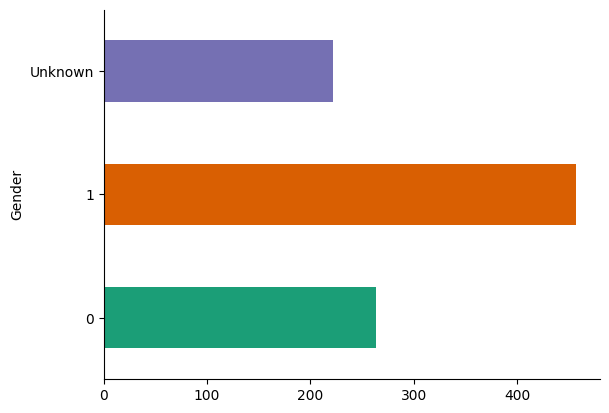

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
filtered_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
# Assuming "dataset_facebook_comments" is your DataFrame
unknown_names_df = filtered_df[filtered_df["Gender"] == "Unknown"]

# Selecting only the "profileName" and "Gender" columns
unknown_names_df = unknown_names_df[["profileName", "Gender"]]

print(unknown_names_df["Gender"].value_counts())

# Displaying the filtered DataFrame
unknown_names_df

Gender
Unknown    222
Name: count, dtype: int64


profileName   Gender
3         Chadanee Nepal  Unknown
5            अरुणा भुजेल  Unknown
15       राधिका बेल्वासे  Unknown
17   Shriya Bhat Chhetri  Unknown
20              Anny Rai  Unknown
..                   ...      ...
924        Januvi Poudel  Unknown
926        NiruCa Karkee  Unknown
927        NiruCa Karkee  Unknown
929        NiruCa Karkee  Unknown
931        NiruCa Karkee  Unknown

[222 rows x 2 columns]

# English text to Nepali

In [37]:
# Convert NaN values to empty strings in the 'text' column
filtered_df.loc[:,'text'] = filtered_df['text'].fillna('')

In [38]:
filtered_df

attachments/0/style_list/0 attachments/0/style_list/1  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
..                         ...                        ...   
937                        NaN                        NaN   
938                        NaN                        NaN   
939                        NaN                        NaN   
940                        NaN                        NaN   
941                        NaN                        NaN   

    attachments/0/style_list/2 attachments/0/style_list/3  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
..                         ...                        ...   
937                        NaN                        NaN   
938                        NaN                        NaN   
939                        NaN                        NaN   
940                        NaN                        NaN   
941                        NaN                        NaN   

    attachments/0/style_list/4  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
..                         ...   
937                        NaN   
938                        NaN   
939                        NaN   
940                        NaN   
941                        NaN   

                                            commentUrl  commentsCount  \
0    https://www.facebook.com/officialroutineofnepa...          104.0   
1    https://www.facebook.com/officialroutineofnepa...           16.0   
2    https://www.facebook.com/officialroutineofnepa...            5.0   
3    https://www.facebook.com/officialroutineofnepa...            3.0   
4    https://www.facebook.com/officialroutineofnepa...            3.0   
..                                                 ...            ...   
937  https://www.facebook.com/officialroutineofnepa...            NaN   
938  https://www.facebook.com/officialroutineofnepa...            4.0   
939  https://www.facebook.com/officialroutineofnepa...            NaN   
940  https://www.facebook.com/officialroutineofnepa...            NaN   
941  https://www.facebook.com/officialroutineofnepa...            2.0   

                         date        facebookId  \
0    2022-02-24T04:07:17.000Z  5923416467691097   
1    2022-02-24T06:21:07.000Z  5923416467691097   
2    2022-02-24T03:19:25.000Z  5923416467691097   
3    2022-02-24T05:16:04.000Z  5923416467691097   
4    2022-02-24T04:12:22.000Z  5923416467691097   
..                        ...               ...   
937  2022-02-24T04:02:18.000Z  5923416467691097   
938  2022-02-24T03:18:14.000Z  5923416467691097   
939  2022-02-24T12:47:23.000Z  5923416467691097   
940  2022-02-24T12:46:00.000Z  5923416467691097   
941  2022-02-24T12:36:10.000Z  5923416467691097   

                                           facebookUrl  ...  \
0    https://www.facebook.com/officialroutineofnepa...  ...   
1    https://www.facebook.com/officialroutineofnepa...  ...   
2    https://www.facebook.com/officialroutineofnepa...  ...   
3    https://www.facebook.com/officialroutineofnepa...  ...   
4    https://www.facebook.com/officialroutineofnepa...  ...   
..                                                 ...  ...   
937  https://www.facebook.com/officialroutineofnepa...  ...   
938  https://www.facebook.com/officialroutineofnepa...  ...   
939  https://www.facebook.com/officialroutineofnepa...  ...   
940  http

In [39]:
import sys
import os
# Get the current working directory
current_dir = os.getcwd()

# Compute the root directory of the project
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the sys.path
if root_dir not in sys.path:
    sys.path.insert(0, root_dir)

root_dir

'c:\\Users\\samir\\Desktop\\NepSense-main'

In [40]:
from dataclasses import dataclass, field
from fairseq.dataclass.configs import CommonConfig

@dataclass
class FairseqConfig:
    common: CommonConfig = field(default_factory=CommonConfig)

c:\Users\samir\Desktop\NepSense-main\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
# model support the following languages : [as, bn, brx, gom, gu, hi, kn, ks, mai, ml, mni, mr, ne, or, pa, sa, sd, si, ta, te, ur]
# importing ai4bharat transliteration module
from ai4bharat.transliteration import XlitEngine
%pip uninstall -y omegaconf
%pip install omegaconf==2.2.0


# e = XlitEngine(lang2use="ne", beam_width=10, rescore=True)
# out = e.translit_word("namasthe", topk=5)
# print(out)

Found existing installation: omegaconf 2.2.0
Uninstalling omegaconf-2.2.0:
  Successfully uninstalled omegaconf-2.2.0
Note: you may need to restart the kernel to use updated packages.
  Using cached omegaconf-2.2.0-py3-none-any.whl.metadata (3.6 kB)
Using cached omegaconf-2.2.0-py3-none-any.whl (77 kB)
Note: you may need to restart the kernel to use updated packages.


Reason for being yanked: Accidental release
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fairseq 0.12.2 requires omegaconf<2.1, but you have omegaconf 2.2.0 which is incompatible.
hydra-core 1.0.7 requires omegaconf<2.1,>=2.0.5, but you have omegaconf 2.2.0 which is incompatible.


In [42]:
 e = XlitEngine(lang2use="ne", beam_width=10, rescore=True)
 out = e.translit_word("namasthe", topk=5)
 print(out)
%pip install scipy==1.10.1

Initializing Multilingual model for transliteration


2024-05-25 16:26:41 | INFO | fairseq.data.multilingual.multilingual_data_manager | loaded language list from C:\Users\samir\Desktop\NepSense-main\.conda\Lib\site-packages\ai4bharat\transliteration\transformer\models\en2indic\v1.0\../lang_list.txt as they are ordered in file
2024-05-25 16:26:41 | INFO | fairseq.data.multilingual.multilingual_data_manager | [en] dictionary: 54 types
2024-05-25 16:26:41 | INFO | fairseq.data.multilingual.multilingual_data_manager | [ur] dictionary: 806 types
Loading dicts into RAM: 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]
2024-05-25 16:26:45 | INFO | fairseq.tasks.translation_multi_simple_epoch | start batch sampler: mem usage: used=6612.76171875Mb; avail=1447.79296875Mb
2024-05-25 16:26:45 | INFO | fairseq.tasks.translation_multi_simple_epoch | [None] @batch_sampler order indices time: 0:00:00.016700
2024-05-25 16:26:45 | INFO | fairseq.tasks.translation_multi_simple_epoch | mem usage: used=6614.3515625Mb; avail=1446.1953125Mb
2024-05-25 16:26:45 | 

{'ne': ['नमस्थे', 'नामस्थे', 'नमास्थे', 'नामास्थे', 'नम्मस्थे']}



In [66]:
from Preprocessing.Nepali_nlp.Nepali_nlp.unicode_nepali import Unicode
import pandas as pd
from langdetect import detect, LangDetectException
from nepali_unicode_converter.convert import Converter
from tqdm import tqdm

# Define your conversion functions
def nepali_nlp_text_conversion(text):
    if isinstance(text, str) and text.strip():
        try:
            lang = detect(text)
            if lang != "ne":
                return Unicode().unicode_word(text)
        except LangDetectException:
            pass
    return text

def ai4bharat_text_conversion(text):
    if isinstance(text, str) and text.strip():
        temp_results = e.translit_sentence(text)["ne"]
        return temp_results
    return text

# Define the function that applies conversions to the DataFrame
def nepali_nlp_conversion(df):
    converter = Converter()

    # Wrap the apply functions with tqdm for the progress bar
    tqdm.pandas(desc="Applying Nepali NLP Conversion")
    df["nepali_nlp_conversion"] = df["text"].progress_apply(nepali_nlp_text_conversion)

    tqdm.pandas(desc="Applying Unicode Conversion Conversion")
    df["unicode_conversion"] = df["text"].progress_apply(lambda x: converter.convert(x) if isinstance(x, str) else '')

    tqdm.pandas(desc="Applying ai4bharat Conversion")
    df["ai4bharat"] = df["text"].progress_apply(ai4bharat_text_conversion)
    return df

Applying ai4bharat Conversion:   0%|          | 0/942 [00:00<?, ?it/s]2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | start batch sampler: mem usage: used=6731.49609375Mb; avail=1329.8203125Mb
2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | [None] @batch_sampler order indices time: 0:00:00.006998
2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | mem usage: used=6731.49609375Mb; avail=1329.8203125Mb
2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | [None] @batch_sampler filter_by_size time: 0:00:00
2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | mem usage: used=6731.49609375Mb; avail=1329.8203125Mb
2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | [None] @batch_sampler batch_by_size time: 0:00:00
2024-05-25 17:00:54 | INFO | fairseq.tasks.translation_multi_simple_epoch | [None] per epoch batch_sampler set-up time: 0:00:00.02200

In [53]:
print(filtered_df)


    attachments/0/style_list/0 attachments/0/style_list/1  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
..                         ...                        ...   
937                        NaN                        NaN   
938                        NaN                        NaN   
939                        NaN                        NaN   
940                        NaN                        NaN   
941                        NaN                        NaN   

    attachments/0/style_list/2 attachments/0/style_list/3  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                      

In [54]:

filtered_df.dropna(subset=['text'],inplace=True)  # Remove rows with any NaN values
import pandas as pd


# Create a boolean mask to identify rows where the "text" column contains "RIP Kauresss"
mask = filtered_df["text"].str.contains("RIP Kauresss", na=False)

# Use the mask to filter out the rows containing "RIP Kauresss"
filtered_df = filtered_df[~mask]
filtered_df.info()

filtered_df=nepali_nlp_conversion(df=filtered_df.copy())
filtered_df[["text","unicode_conversion","nepali_nlp_conversion","ai4bharat"]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   attachments/0/style_list/0             8 non-null      object 
 1   attachments/0/style_list/1             8 non-null      object 
 2   attachments/0/style_list/2             8 non-null      object 
 3   attachments/0/style_list/3             8 non-null      object 
 4   attachments/0/style_list/4             2 non-null      object 
 5   commentUrl                             942 non-null    object 
 6   commentsCount                          196 non-null    float64
 7   date                                   942 non-null    object 
 8   facebookId                             942 non-null    int64  
 9   facebookUrl                            942 non-null    object 
 10  feedbackId                             942 non-null    object 
 11  id    

KeyError: "['unicode_conversion', 'ai4bharat'] not in index"

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   attachments/0/style_list/0  4 non-null      object 
 1   attachments/0/style_list/1  4 non-null      object 
 2   attachments/0/style_list/2  2 non-null      object 
 3   attachments/0/style_list/3  2 non-null      object 
 4   commentUrl                  555 non-null    object 
 5   commentsCount               50 non-null     float64
 6   date                        555 non-null    object 
 7   facebookId                  555 non-null    int64  
 8   facebookUrl                 555 non-null    object 
 9   feedbackId                  555 non-null    object 
 10  id                          555 non-null    object 
 11  likesCount                  555 non-null    int64  
 12  profileId                   555 non-null    object 
 13  profileName                 555 non

In [ ]:
filtered_df["Profanity"].value_counts()

Profanity
0    483
1     72
Name: count, dtype: int64

In [ ]:
filtered_df["Offensive"].value_counts()

Offensive
0    504
1     51
Name: count, dtype: int64

In [ ]:
columns_to_keep=[13,17,19,20,21,22,23,24,25,26,27,28]
filtered_df_colsneededonly = filtered_df.iloc[:, columns_to_keep]

# Saving the final Output

In [ ]:
import os
os.makedirs(os.path.dirname(filtered_dataset_output_path), exist_ok=True)
columns_to_keep.to_csv(filtered_dataset_output_path)